Usando o dataset seeds.csv, encontre o melhor número de clusters para o K-means usando *inertia* e *silhouette coefficient*

In [58]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('seeds.csv')
del df['grain_variety']
df.head()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [59]:
X = df.values

### TO-DO

* Crie uma instância do K-means chamada *model* com k clusters (k variando de 1 a 6)
* Treine um modelo usando os dados (X) para cada k
* adicione o valor de *inertias_* de cada modelo numa lista chamada inertias

In [60]:
from sklearn.cluster import KMeans

# Convertendo o DataFrame para array numpy
X = df.values

# Criando uma lista vazia para armazenar as inércias
inertias = []

# Iterando sobre os valores de k (1 a 6)
for k in range(1, 7):
    # Instanciando o K-means
    model = KMeans(n_clusters=k)
    
    # Treinando o modelo com os dados
    model.fit(X)
    
    # Adicionando a inércia do modelo à lista
    inertias.append(model.inertia_)


### TO-DO
* plote as inércias para determinar o melhor valor de k

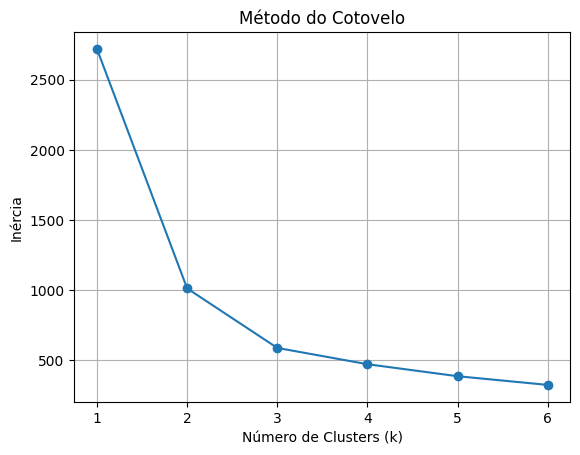

In [61]:
import matplotlib.pyplot as plt

# Criando uma visualização do Elbow Method (Método do Cotovelo)
plt.plot(range(1, 7), inertias, marker='o')
plt.title("Método do Cotovelo")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inércia")
plt.xticks(range(1, 7))
plt.grid()
plt.show()


### TO-DO
* Encontre o melhor valor de k usando *silhouette coefficient* 


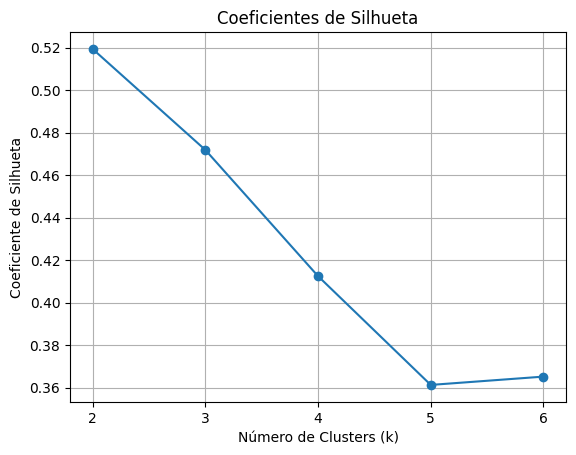

O melhor valor de k é: 2


In [62]:
from sklearn.metrics import silhouette_score

# Criando uma lista vazia para armazenar os coeficientes de silhueta
silhouette_coefficients = []

# Iterando sobre os valores de k (2 a 6, pois o mínimo de clusters é 2 para calcular a silhueta)
for k in range(2, 7):
    # Instanciando o K-means
    model = KMeans(n_clusters=k)
    
    # Treinando o modelo com os dados
    model.fit(X)
    
    # Calculando o coeficiente de silhueta
    score = silhouette_score(X, model.labels_)
    
    # Adicionando o coeficiente de silhueta à lista
    silhouette_coefficients.append(score)

# Criando uma visualização do coeficiente de silhueta
plt.plot(range(2, 7), silhouette_coefficients, marker='o')
plt.title("Coeficientes de Silhueta")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Coeficiente de Silhueta")
plt.xticks(range(2, 7))
plt.grid()
plt.show()

# Encontrando o melhor valor de k (número de clusters com maior coeficiente de silhueta)
best_k = 2 + silhouette_coefficients.index(max(silhouette_coefficients))
print("O melhor valor de k é:", best_k)


### TO-DO
* Treine um cluster hierárquico e veja como essa solução se compara com a do k-means
* use o método fit tanto do k-means quanto do cluster hierárquico para comparar os resultados

In [63]:
from sklearn.cluster import AgglomerativeClustering

# Instanciando o AgglomerativeClustering com o melhor valor de k encontrado
hclus = AgglomerativeClustering(n_clusters=best_k)

# Treinando o modelo com os dados
hclus.fit(X)

# Obtendo os rótulos das amostras
hclus_labels = hclus.labels_
hclus_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [64]:
# Instanciando o K-means com o melhor valor de k encontrado
kmeans = KMeans(n_clusters=best_k)

# Treinando o modelo com os dados
kmeans.fit(X)

# Obtendo os rótulos das amostras
kmeans_labels = kmeans.labels_
kmeans_labels

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])